## CAS KAGGLE

Pol Vila Simón 1674294

Enric Ferrera González 1672969

#### Introducció

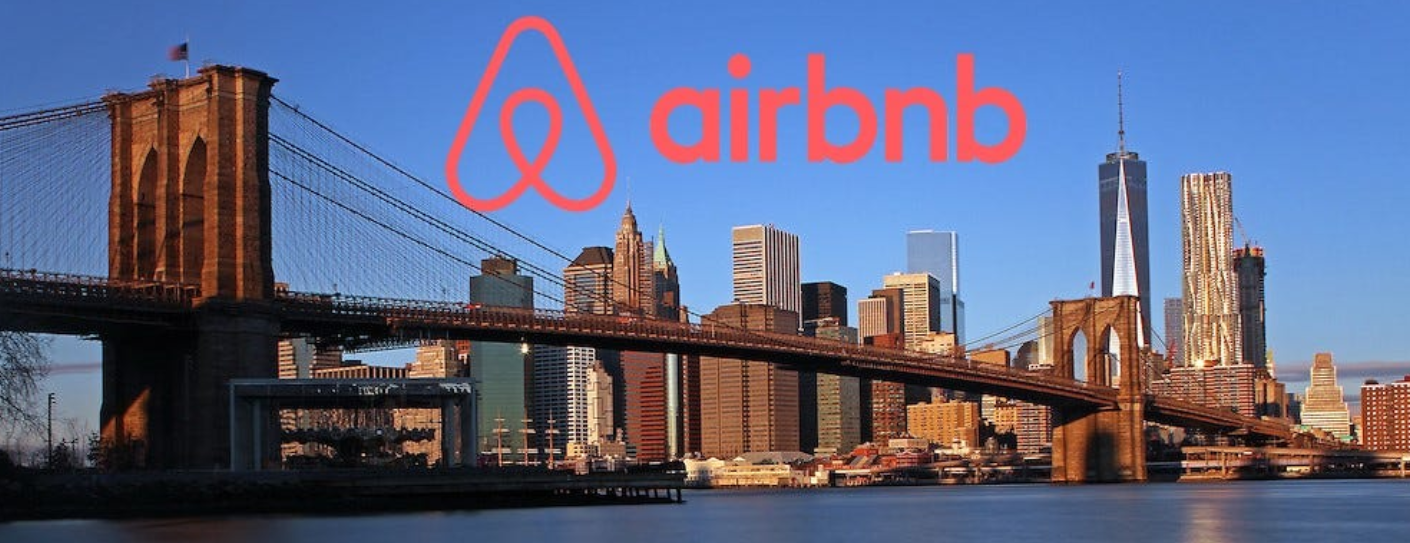

Des de 2008, els hostes i amfitrions han utilitzat Airbnb per ampliar les possibilitats de viatge i presentar una forma més única i personalitzada d'experimentar el món. Aquest conjunt de dades descriu l'activitat i les mètriques del llistat a NYC, NY per al 2019.

Aquest fitxer de dades inclou tota la informació necessària per saber més sobre els amfitrions, la disponibilitat geogràfica, les mètriques necessàries per fer prediccions i extreure conclusions.

El nostre cas kaggle, es tracta d'un problema de regressió, el target serà predir el preu per nit del AirBnb.

Guia 

1- introducció / llegir base de dades
2- data cleaning / preprocessament (tractar els nans, tractar els outliers)
3- Exploration data analisiy 

Primer de tot anem importar les llibreries que ens seràn necessaries. 



In [12]:
#importem llibreries
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

### 1. Exploratory Data Analysis  (EDA)

EDA s'utilitza principalment per a veure el que les dades poden revelar més enllà del modelatge formal o la tasca de prova d'hipòtesi i proporciona una millor comprensió de les variables del conjunt de dades i les relacions entre elles. A partir d'aquest anàl·lis podem extreure les primeres conclusions. 

##### Anàlisis descriptiu del dataset 


Primer de tot llegim el dataset. És molt important veure les dades i examinar-les juntament amb els atributs del nostre dataset per entrendre-ls així serà més fàcil per preparar les dades per futurs anàl·lisis.  

In [13]:
df = pd.read_csv('dataset/AB_NYC_2019.csv')

print(f'El nombre de mostres son: {df.shape[0]}')
print(f"El nombre d'atributs son: {df.shape[1]}")

print(df.dtypes)

#Ajustem les columnes del output per una millor visualització
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.head()

El nombre de mostres son: 48895
El nombre d'atributs son: 16
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington    40.647    -73.972   
1     Jennifer           Manhattan       Midtown    40.754    -73.984   
2    Elisabeth           Manhattan        Harlem    40.809    -73.942   
3  LisaRoxanne            Brooklyn  Clinton Hill    40.685    -73.960   
4        Laura           Manhattan   East Harlem    40.799    -73.944   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0              0.210                               6               365  
1              0.380                               2               355  
2                NaN                               1               365  
3              4.640                               1               194  
4              0.100                               1                 0

Com podem veur el nostre dataset té 48895 mostres, és a dir files. I després té 16 atributs. El target serà l'atribut price.

#### Descripció dels atributs: 
- id: identificador 
- name: nom de l'anunci
- host_id: id del host 
- neighbourhood_group: localització
- neighbourhood: barri 
- latitude: latitud
- longitude: longitud
- room_type: tipus d'apartament 
- price: preu en dolars (target)
- number_of_reviews: número de reviews
- last_review: data de l'ultima ressenya
- calculated_host_listings_count: número de apartamentos que tiene el anfitrion
- availability_365: número de dias que está disponible para reservar 



In [14]:
#realitzem un anàl·lisis descriptiu 
df.describe()

id       host_id  latitude  longitude     price  \
count    48895.000     48895.000 48895.000  48895.000 48895.000   
mean  19017143.236  67620010.647    40.729    -73.952   152.721   
std   10983108.386  78610967.033     0.055      0.046   240.154   
min       2539.000      2438.000    40.500    -74.244     0.000   
25%    9471945.000   7822033.000    40.690    -73.983    69.000   
50%   19677284.000  30793816.000    40.723    -73.956   106.000   
75%   29152178.500 107434423.000    40.763    -73.936   175.000   
max   36487245.000 274321313.000    40.913    -73.713 10000.000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count       48895.000          48895.000          38843.000   
mean            7.030             23.274              1.373   
std            20.511             44.551              1.680   
min             1.000              0.000              0.010   
25%             1.000              1.000              0.190   
50%             3.000              5.000              0.720   
75%             5.000             24.000              2.020   
max          1250.000            629.000             58.500   

       calculated_host_listings_count  availability_365  
count                       48895.000         48895.000  
mean                            7.144           112.781  
std                            32.953           131.622  
min                             1.000             0.000  
25%                             1.000             0.000  
50%                             1.000            45.000  
75%                             2.000           227.000  
max                           327.000           365.000

Podem veure que la mitjana de preus és de 152.74 $ per nit. La mitajana de número de nits és 7. També sorprén que la mínima 'availability_365' és de 0, és a dir que no hi ha disponibilitat en cap dia del any. 

Eliminem files on el preu sigui 0 i la disponibilitat sigui 0 també ja que no té sentit i podria fer que el rendiment del nostre model empitjores. Son molt poques files per tant, les eliminem. 

In [15]:
df = df[(df['price'] != 0) | (df['availability_365'] != 0)]
df.shape

(48892, 16)

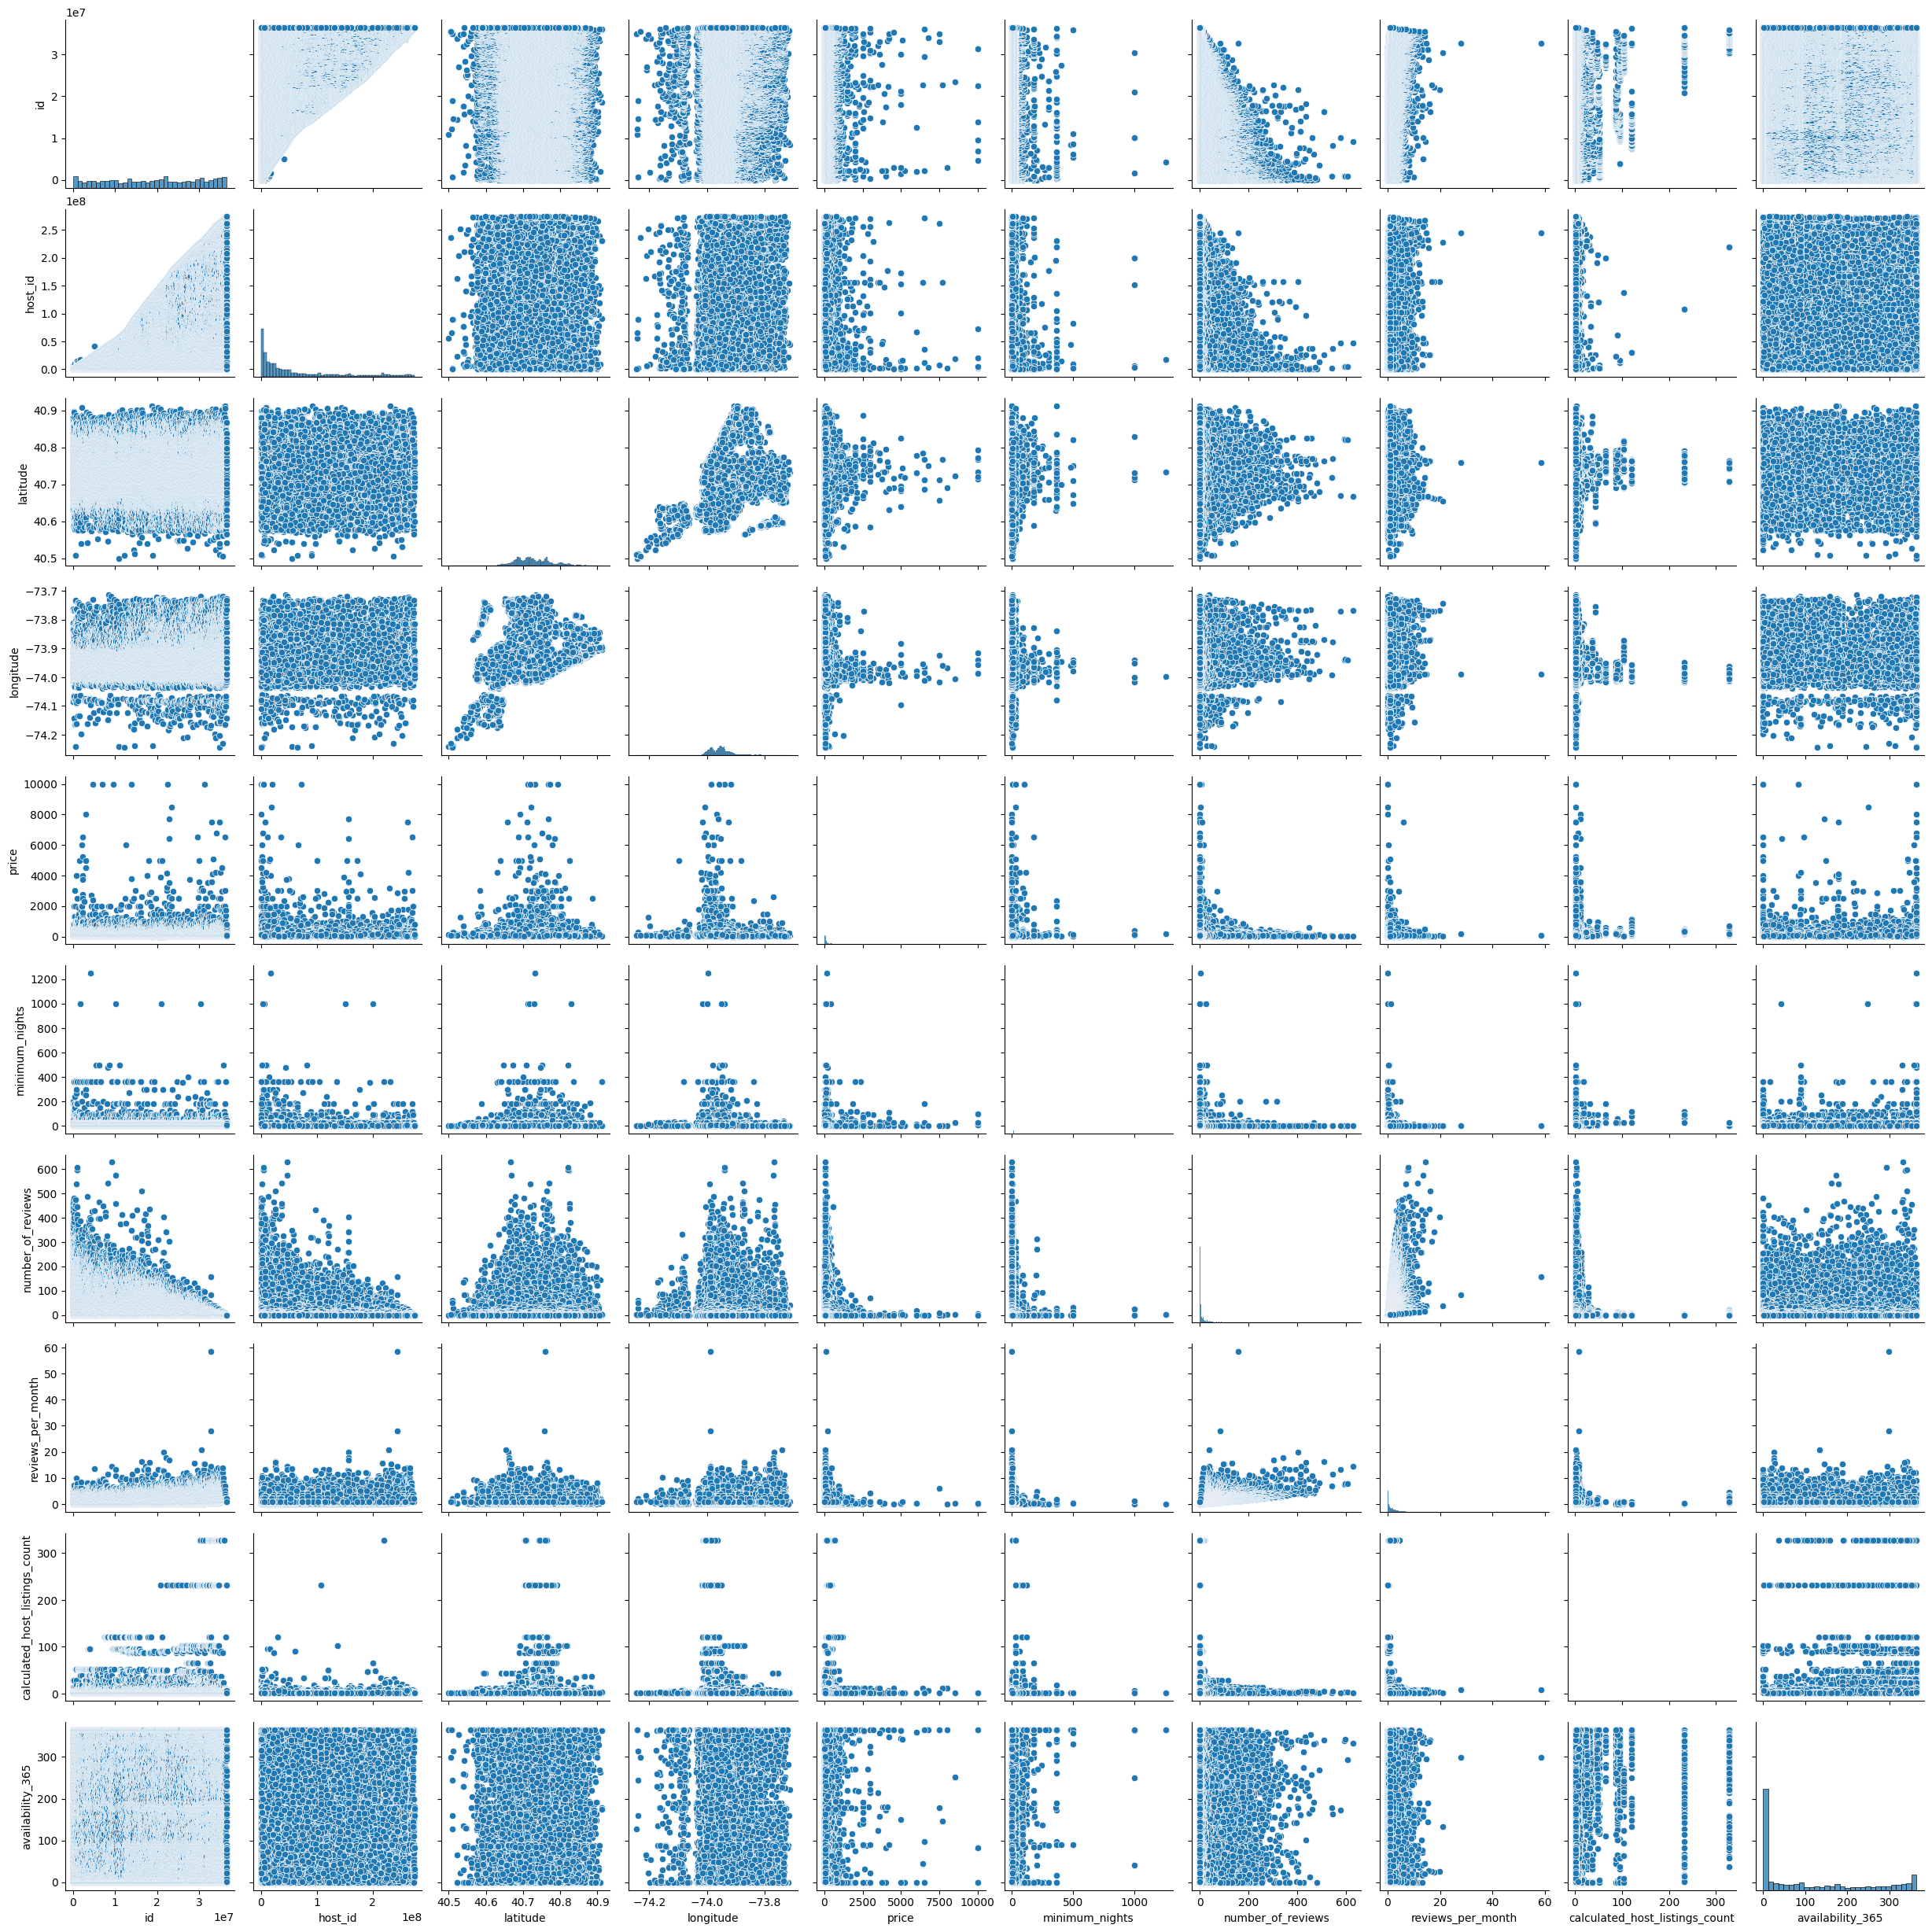

In [16]:
#### Basic plotting i visualització del dataset
sns.pairplot(df)
plt.show()

Anem  a veure la distribució de l'atribut target 

<Axes: ylabel='Density'>

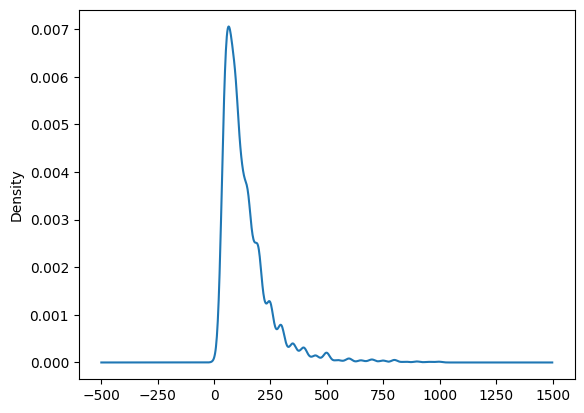

In [17]:
df[df['price'] < 1000]['price'].plot.density()

Text(0, 0.5, 'Nº AirBnb')

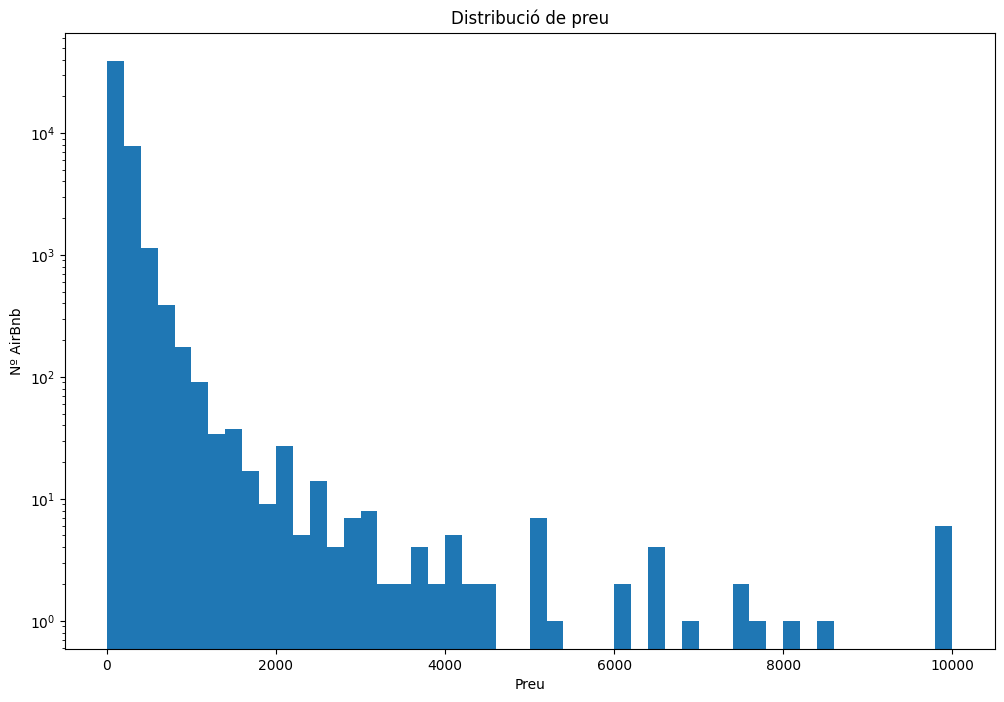

In [18]:
# Distribució del preu d'alquiler 
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(df['price'], bins=50, log=True)
ax.set_title('Distribució de preu')
ax.set_xlabel('Preu')
ax.set_ylabel('Nº AirBnb')

##### Preprocessament i Data Cleaning 

##### Mirem si conté valors nuls

In [19]:
#numero de valores nulos en el dataset 
num_valors_null = df.isnull().sum()
percentatge_null = df.isnull().sum()/df.size

#percentatge valors nuls, per entendre millor 
print(percentatge_null)

#llistem els valors nuls
columna_null = df.columns[df.isnull().any()].to_list()
print(f'Columnes amb valors nuls: {columna_null}')


id                               0.000
name                             0.000
host_id                          0.000
host_name                        0.000
neighbourhood_group              0.000
neighbourhood                    0.000
latitude                         0.000
longitude                        0.000
room_type                        0.000
price                            0.000
minimum_nights                   0.000
number_of_reviews                0.000
last_review                      0.013
reviews_per_month                0.013
calculated_host_listings_count   0.000
availability_365                 0.000
dtype: float64
Columnes amb valors nuls: ['name', 'host_name', 'last_review', 'reviews_per_month']


In [20]:
# número de valors nulls 
for valor in columna_null:
    print(df[valor].isnull().value_counts())

name
False    48876
True        16
Name: count, dtype: int64
host_name
False    48871
True        21
Name: count, dtype: int64
last_review
False    38841
True     10051
Name: count, dtype: int64
reviews_per_month
False    38841
True     10051
Name: count, dtype: int64


#### Remplaçament de valors nuls 

Les columnes 'name', 'host_name' tenen molt pocs nans. Per tant, la manera més fácil i sense afectar al model és eliminant les files que contenen els nans.  

Podem observar, que last_review i reviews_per_month estan connectats un amb l'altre. Els valors que falten representen que no s'ha deixat una ressenya per aquella anunci AirBnb. Basicament si no hi ha la data de ressenya tampoc estará el camp reviews_per_month (és un percentatge).
 - Les reviews_per_month replacarem els nans per una puntuació de 0.0, que indicarà que no hi ha ressenya.
 - La last_reviews_per_month per una data simbolica que sera l'última data possible '2019-12-31' 

In [21]:
#eliminem files amb nans 'name'
df.dropna(subset=['name'], inplace=True)

#eliminem files amb nans 'host_name'
df.dropna(subset=['host_name'], inplace=True)


In [22]:
#omplim reviews_per_month
df['reviews_per_month'] = df['reviews_per_month'].fillna(0.0)

#omplim last_reviews_per_month
df['last_review'] = df['last_review'].fillna("2019-12-31")

In [23]:
df.isnull().sum()/df.size

id                               0.000
name                             0.000
host_id                          0.000
host_name                        0.000
neighbourhood_group              0.000
neighbourhood                    0.000
latitude                         0.000
longitude                        0.000
room_type                        0.000
price                            0.000
minimum_nights                   0.000
number_of_reviews                0.000
last_review                      0.000
reviews_per_month                0.000
calculated_host_listings_count   0.000
availability_365                 0.000
dtype: float64

Podem veure com no queda cap nan.

##### Data Cleaning

Anem a eliminar els atributs que pel nostre model no són rellevants per calcular el target. També eliminant atributs redueix la possibilitat de overfitting. Els atributs a eliminar serán els seguents. 




In [24]:

df_new = df.drop(['name','id','last_review','host_name','host_id'],axis=1)
df_new.dtypes

neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Per entendre millor realitzarem unes gràfiques per tal de visualitzar els atributs i fer-nos una idea. 

Mostrem la localització dels airbnb per barris

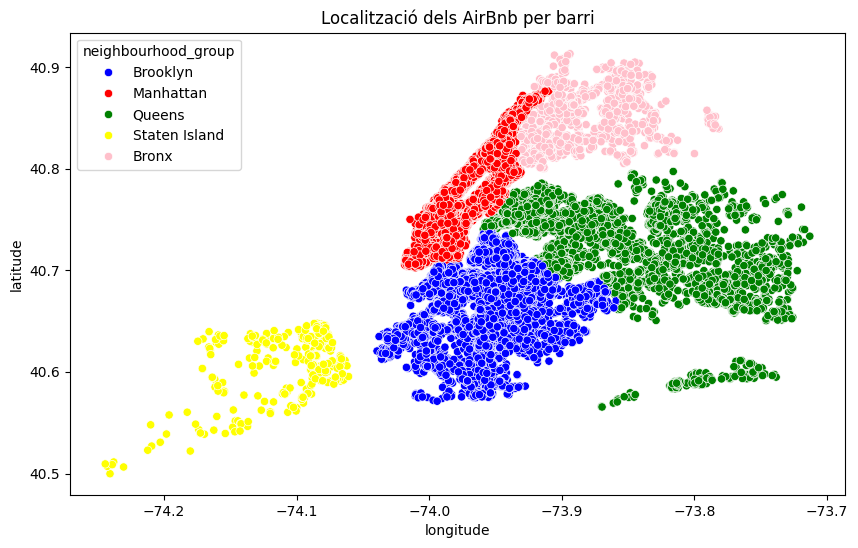

In [25]:
# Assignem colors als grups de barris
group_palette = {
    'Brooklyn': 'blue',
    'Manhattan': 'red',
    'Queens': 'green',
    'Bronx': 'pink',
    'Staten Island': 'yellow'
}

title = 'Localització dels AirBnb per barri'

# Creem gràfic de dispersió
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df, palette=group_palette).set_title(title)
plt.show()

Mirem districtes on hi ha més apartaments 


In [26]:
df.groupby(['neighbourhood_group','neighbourhood'])['neighbourhood'].count().reset_index(name='apt. count').sort_values('apt. count',ascending=False).head(10)


neighbourhood_group       neighbourhood  apt. count
93             Brooklyn        Williamsburg        3917
50             Brooklyn  Bedford-Stuyvesant        3713
105           Manhattan              Harlem        2655
58             Brooklyn            Bushwick        2461
124           Manhattan     Upper West Side        1969
106           Manhattan      Hell's Kitchen        1954
100           Manhattan        East Village        1852
123           Manhattan     Upper East Side        1797
65             Brooklyn       Crown Heights        1563
112           Manhattan             Midtown        1545

Distribució dels airbnb per barris i districtes

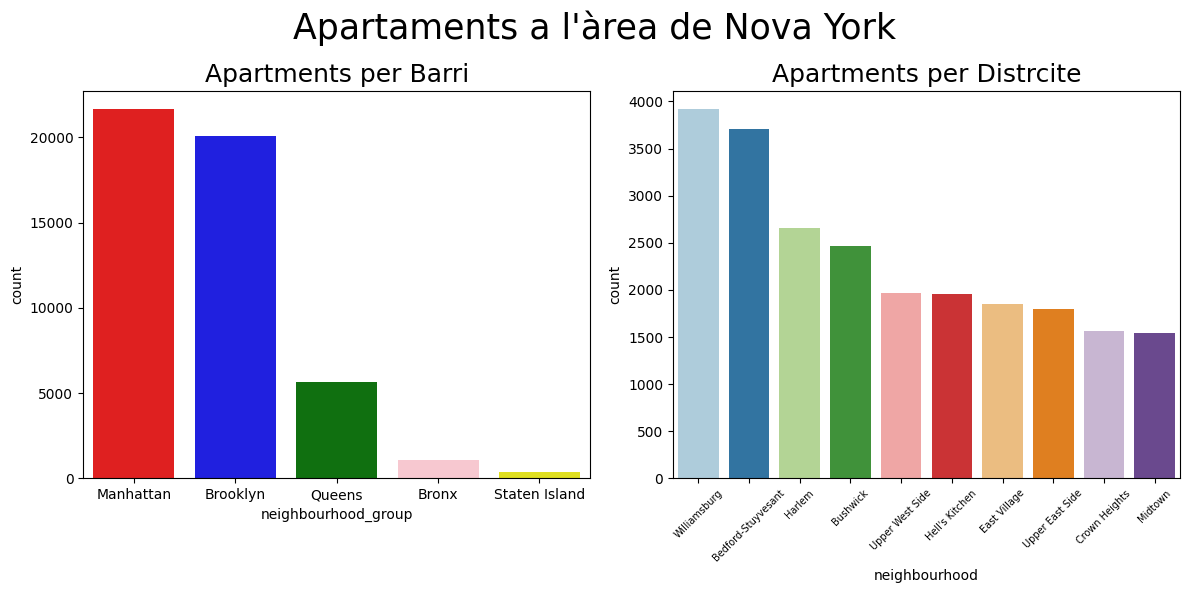

In [27]:
# Agrupem les dades per neighborhood_group i per neighborhood
neighbourhood_group = df.groupby('neighbourhood_group')['neighbourhood_group'].count().reset_index(name='count').sort_values('count', ascending=False)
neighbourhood = df.groupby('neighbourhood')['neighbourhood'].count().reset_index(name='count').sort_values('count', ascending=False)

neighbourhood_colors = sns.color_palette("Paired", n_colors=len(neighbourhood.head(10)))
neighbourhood_palette = dict(zip(neighbourhood['neighbourhood'].head(10), neighbourhood_colors))

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

ax1 = sns.barplot(data=neighbourhood_group, x='neighbourhood_group', y='count', ax=ax1, hue='neighbourhood_group', palette=group_palette)
ax1.set_title('Apartments per Barri', size=18)

ax2 = sns.barplot(data=neighbourhood.head(10), x='neighbourhood', y='count', ax=ax2, hue='neighbourhood', palette=neighbourhood_palette)
#ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, fontsize=7)
plt.xticks(rotation=45, fontsize=7)

ax2.set_title('Apartments per Distrcite', size=18)

plt.suptitle("Apartaments a l'àrea de Nova York", size=25)

plt.tight_layout()

plt.show()

Distribució del tipus d'habitació i tipus d'habitació per barri  

C:\Users\eferr\AppData\Local\Temp\ipykernel_5096\3111150042.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room_type', data=df, palette=['red','yellow','green'])


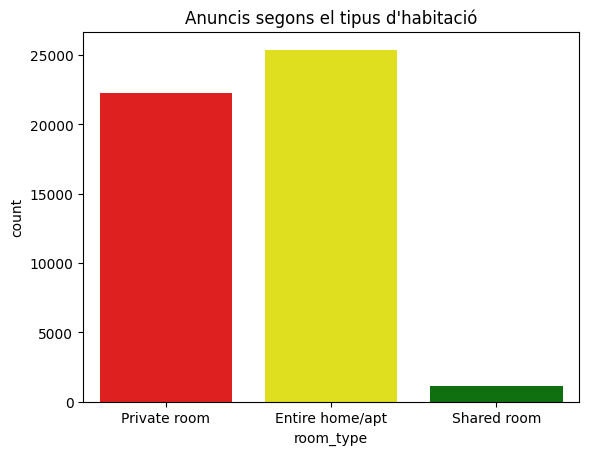

room_type
Entire home/apt    25392
Private room       22304
Shared room         1159
Name: count, dtype: int64


In [28]:
#preu dels anuncis segons tipus d'habitació 
title = "Anuncis segons el tipus d'habitació"
sns.countplot(x='room_type', data=df, palette=['red','yellow','green'])
plt.title(title)
plt.show()

print(df['room_type'].value_counts())

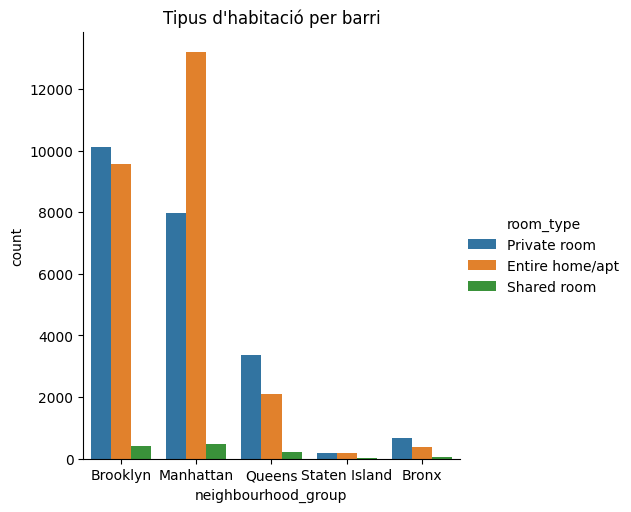

In [29]:
#classificació dels anuncis segons tipus d'habitació i barri 
title = "Tipus d'habitació per barri"
sns.catplot(x='neighbourhood_group', kind="count", hue="room_type", data=df)
plt.title(title)
plt.show()

OUTLIERS

Els outliers són valors atípics que difereixen molt de la resta i poden acabant afectant al model. Per tan, els haurem de tractar

In [30]:

num_features = list(df_new.select_dtypes(include=np.number).columns.values)

print(num_features)

['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


Anem a veure els outliers que conté el dataset per a cada atribut. 

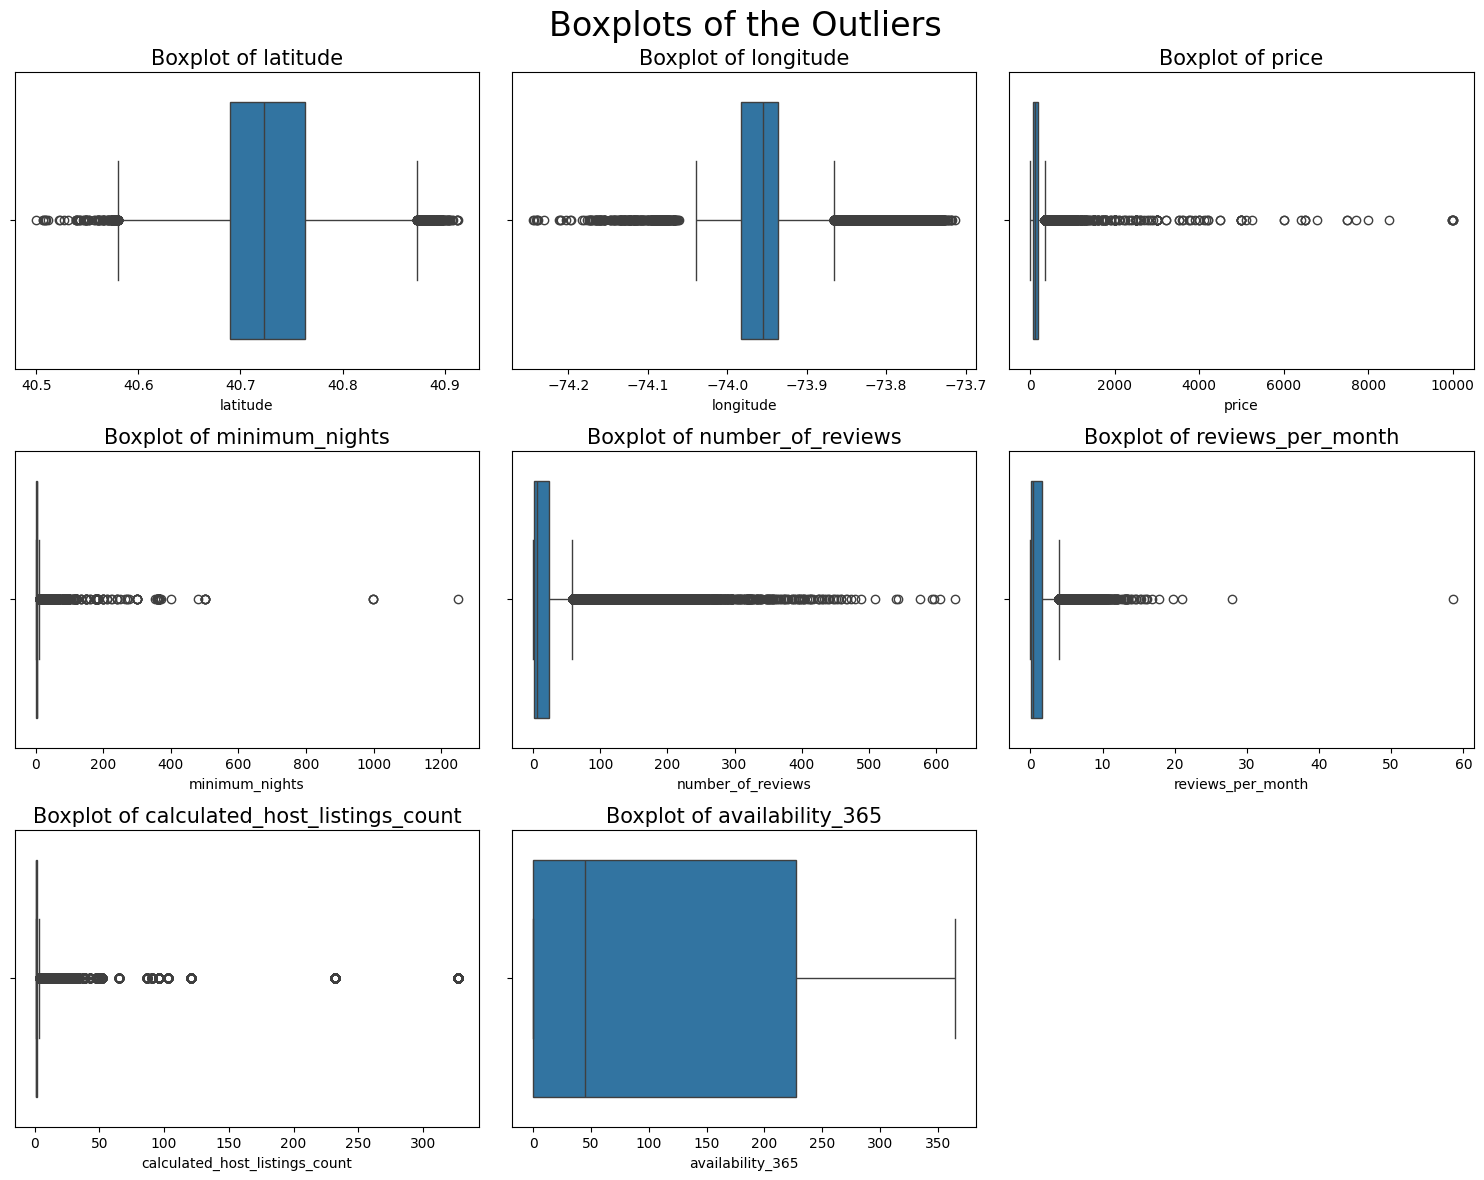

In [31]:
import math

cols = 3

# Calcula el número de filas necesarias
rows = math.ceil(len(num_features) / cols)

# Crea los subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))

# Ajusta los índices para que funcionen con subplots
axes = axes.flatten()  # Aplanar los ejes para un acceso más sencillo

for i, feature in enumerate(num_features):
    sns.boxplot(data=df_new, x=feature, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}', fontsize=15)

# Oculta los subplots vacíos (si hay más ejes que características)
for j in range(len(num_features), len(axes)):
    fig.delaxes(axes[j])

# Título general
fig.suptitle("Boxplots of the Outliers", fontsize=24)
plt.tight_layout()
plt.show()

Anem a mirar el percentatge de outliers

In [32]:
outliers_perc = []

for k,v in df_new[num_features].items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df_new)[0]
    out_tuple = (k,int(perc))
    outliers_perc.append(out_tuple)
    print("Column %s outliers = %.2f%%" % (k,perc))

Column latitude outliers = 0.87%
Column longitude outliers = 5.80%
Column price outliers = 6.09%
Column minimum_nights outliers = 13.59%
Column number_of_reviews outliers = 12.31%
Column reviews_per_month outliers = 6.81%
Column calculated_host_listings_count outliers = 14.49%
Column availability_365 outliers = 0.00%


Els anem a tractar. 

In [33]:
def outlier_capper(data,features):
    
    data_out = data.copy()
    
    for column in features:        
        
        # First define the first and third quartiles
        Q1 = data_out[column].quantile(0.25)
        Q3 = data_out[column].quantile(0.75)
        # Define the inter-quartile range
        IQR = Q3 - Q1
        # ... and the lower/higher threshold values
        lowerL  = Q1 - 1.5 * IQR
        higherL = Q3 + 1.5 * IQR
        
        # Impute 'left' outliers
        data_out.loc[data_out[column] < lowerL,column] = lowerL
        # Impute 'right' outliers
        data_out.loc[data_out[column] > higherL,column] = higherL
        
    return data_out
    

df_new = outlier_capper(df_new,num_features)

C:\Users\eferr\AppData\Local\Temp\ipykernel_5096\3100309497.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-33.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_out.loc[data_out[column] < lowerL,column] = lowerL
C:\Users\eferr\AppData\Local\Temp\ipykernel_5096\3100309497.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_out.loc[data_out[column] < lowerL,column] = lowerL
C:\Users\eferr\AppData\Local\Temp\ipykernel_5096\3100309497.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-340.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_out.loc

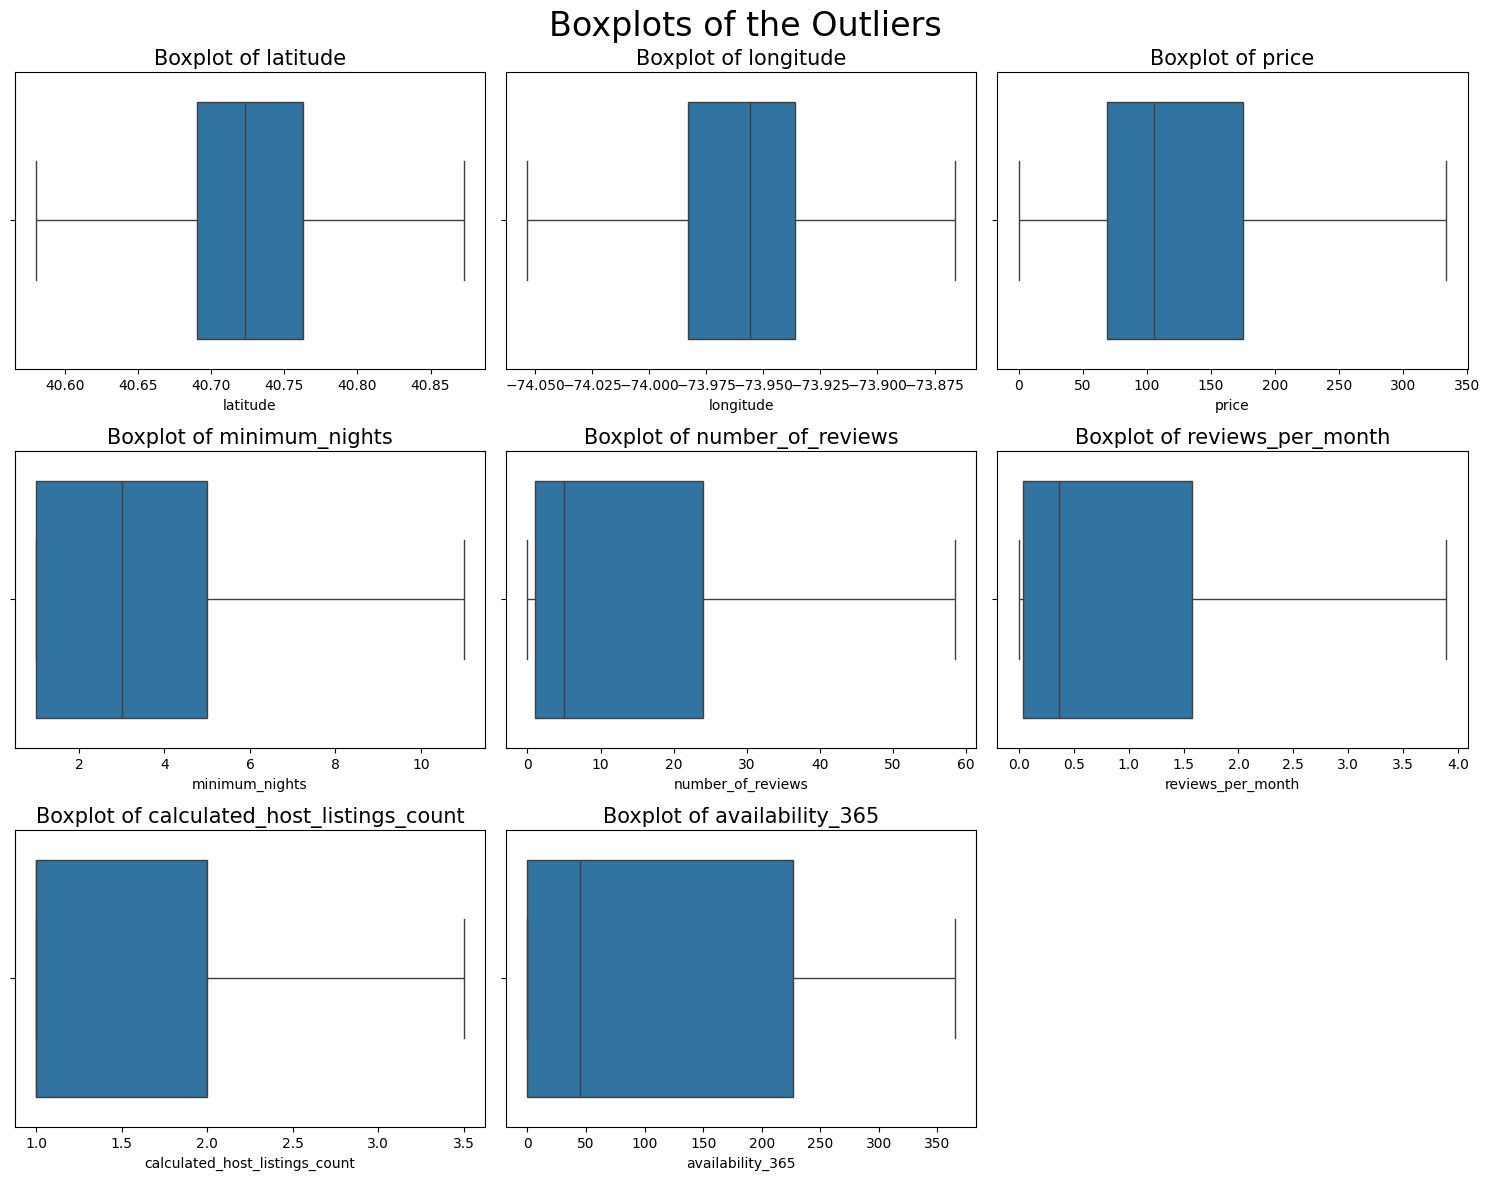

In [34]:
import math

cols = 3

# Calcula el número de filas necesarias
rows = math.ceil(len(num_features) / cols)

# Crea los subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))

# Ajusta los índices para que funcionen con subplots
axes = axes.flatten()  # Aplanar los ejes para un acceso más sencillo

for i, feature in enumerate(num_features):
    sns.boxplot(data=df_new, x=feature, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}', fontsize=15)

# Oculta los subplots vacíos (si hay más ejes que características)
for j in range(len(num_features), len(axes)):
    fig.delaxes(axes[j])

# Título general
fig.suptitle("Boxplots of the Outliers", fontsize=24)
plt.tight_layout()
plt.show()

##### Encoding de les dades

Ara transformarem els atributs objectes en atributs numèrics ja que el l'entrenament del model només accepta atributs numèrics. Farem un label encoder dels atributs neighbourhood, neighbourhood_group
                    

In [35]:
from sklearn.preprocessing import LabelEncoder

#guardem els valors per després poder fer gàfiques
room_type_obj = df['room_type']

neighbourhood_obj = ['neighbourhood_group']


label_encoder = LabelEncoder()
df_new['neighbourhood_group'] = label_encoder.fit_transform(df_new['neighbourhood_group'])

label_encoder = LabelEncoder()
df_new['neighbourhood'] = label_encoder.fit_transform(df_new['neighbourhood'])

label_encoder = LabelEncoder()
df_new['room_type'] = label_encoder.fit_transform(df_new['room_type'])

print(df_new.dtypes)

neighbourhood_group                 int32
neighbourhood                       int32
latitude                          float64
longitude                         float64
room_type                           int32
price                               int64
minimum_nights                      int64
number_of_reviews                 float64
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
dtype: object


Veiem la matriu de correlació entre les variables per veure quina relació hi ha entre les variables entre elles i també amb l'atribut target.

In [36]:
df_new.corr()

neighbourhood_group  neighbourhood  latitude  \
neighbourhood_group                           1.000          0.111     0.286   
neighbourhood                                 0.111          1.000     0.235   
latitude                                      0.286          0.235     1.000   
longitude                                     0.049         -0.126     0.110   
room_type                                    -0.016         -0.072     0.006   
price                                         0.082          0.134     0.075   
minimum_nights                                0.007          0.053     0.032   
number_of_reviews                             0.000         -0.050    -0.026   
reviews_per_month                             0.037         -0.065    -0.022   
calculated_host_listings_count                0.071         -0.039    -0.001   
availability_365                              0.081         -0.034    -0.011   

                                longitude  room_type  price  minimum_nights  \
neighbourhood_group                 0.049     -0.016  0.082           0.007   
neighbourhood                      -0.126     -0.072  0.134           0.053   
latitude                            0.110      0.006  0.075           0.032   
longitude                           1.000      0.213 -0.365          -0.121   
room_type                           0.213      1.000 -0.574          -0.154   
price                              -0.365     -0.574  1.000           0.053   
minimum_nights                     -0.121     -0.154  0.053           1.000   
number_of_reviews                   0.081     -0.005 -0.066          -0.210   
reviews_per_month                   0.125      0.017 -0.056          -0.300   
calculated_host_listings_count      0.079      0.182 -0.057           0.182   
availability_365                    0.073      0.023  0.113           0.157   

                                number_of_reviews  reviews_per_month  \
neighbourhood_group                         0.000              0.037   
neighbourhood                              -0.050             -0.065   
latitude                                   -0.026             -0.022   
longitude                                   0.081              0.125   
room_type                                  -0.005              0.017   
price                                      -0.066             -0.056   
minimum_nights                             -0.210             -0.300   
number_of_reviews                           1.000              0.689   
reviews_per_month                           0.689              1.000   
calculated_host_listings_count              0.052              0.090   
availability_365                            0.191              0.188   

                                calculated_host_listings_count  \
neighbourhood_group                                      0.071   
neighbourhood                                           -0.039   
latitude                                                -0.001   
longitude                                                0.079   
room_type                                                0.182   
price                                                   -0.057   
minimum_nights                                           0.182   
number_of_reviews                                        0.052   
reviews_per_month                                        0.090   
calculated_host_listings_count                           1.000   
availability_365                                         0.414   

                                availability_365  
neighbourhood_group                        0.081  
neighbourhood                             -0.034  
latitude                                  -0.011  
longitude                                  0.073  
room_type                                  0.023  
price                                      0.113  
minimum_nights                             0.157  
number_of_reviews                          0.191  
revie

<Axes: >

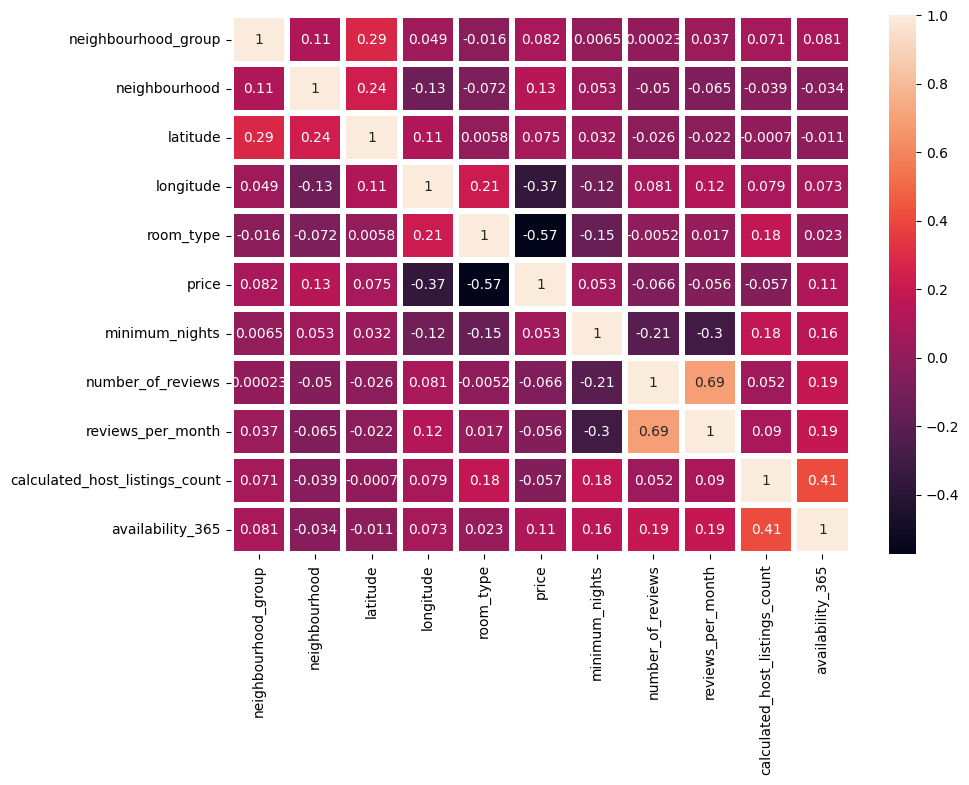

In [37]:
plt.figure(figsize=(10,7))
sns.heatmap(df_new.corr(),annot=True,linewidths=3)

In [38]:
def calcular_correlacio(data, target_column='target'):
    data_temp = data.copy()
    if data_temp[target_column].dtype == 'object':
        data_temp[target_column] = data_temp[target_column].map({'+': 1, '-': 0})
    le = LabelEncoder()
    for column in data_temp.columns:
        if data_temp[column].dtype == 'object' and column != target_column:
            data_temp[column] = le.fit_transform(data_temp[column])
    correlacions = data_temp.corr()[target_column]
    correlacions = correlacions.drop(target_column)
    return correlacions

correlacions = calcular_correlacio(df_new, target_column='price')
print(correlacions)

neighbourhood_group               0.082
neighbourhood                     0.134
latitude                          0.075
longitude                        -0.365
room_type                        -0.574
minimum_nights                    0.053
number_of_reviews                -0.066
reviews_per_month                -0.056
calculated_host_listings_count   -0.057
availability_365                  0.113
Name: price, dtype: float64


C:\Users\eferr\AppData\Local\Temp\ipykernel_5096\932308209.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacions.index, y=correlacions.values,  palette='viridis')


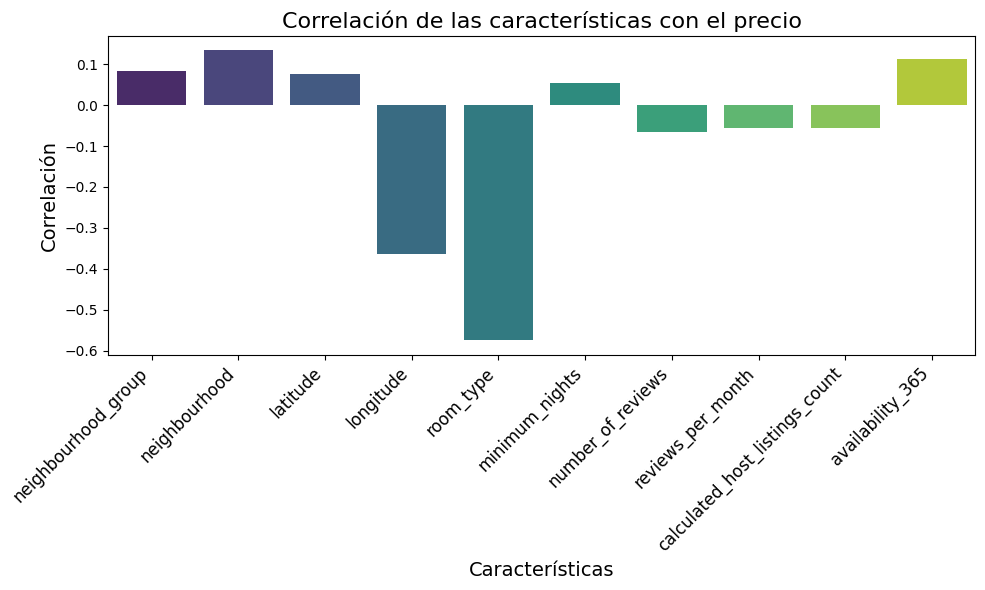

In [39]:
# Crear un gráfico de barras para visualizar las correlaciones
plt.figure(figsize=(10, 6))
sns.barplot(x=correlacions.index, y=correlacions.values,  palette='viridis')

# Añadir títulos y etiquetas
plt.title('Correlación de las características con el precio', fontsize=16)
plt.xlabel('Características', fontsize=14)
plt.ylabel('Correlación', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

CONCLUSIONS: 

### Visualització  (atributs amb el target)



Un cop vist la matriu de correlació de l'atribut target anem a analitzar el preu (que és l'atribut target) amb aquells atributs que tenen major correlació. Anem a graficar aquelles categories que estan més relacionades. 

##### Comparació de preus per els diferents barris 

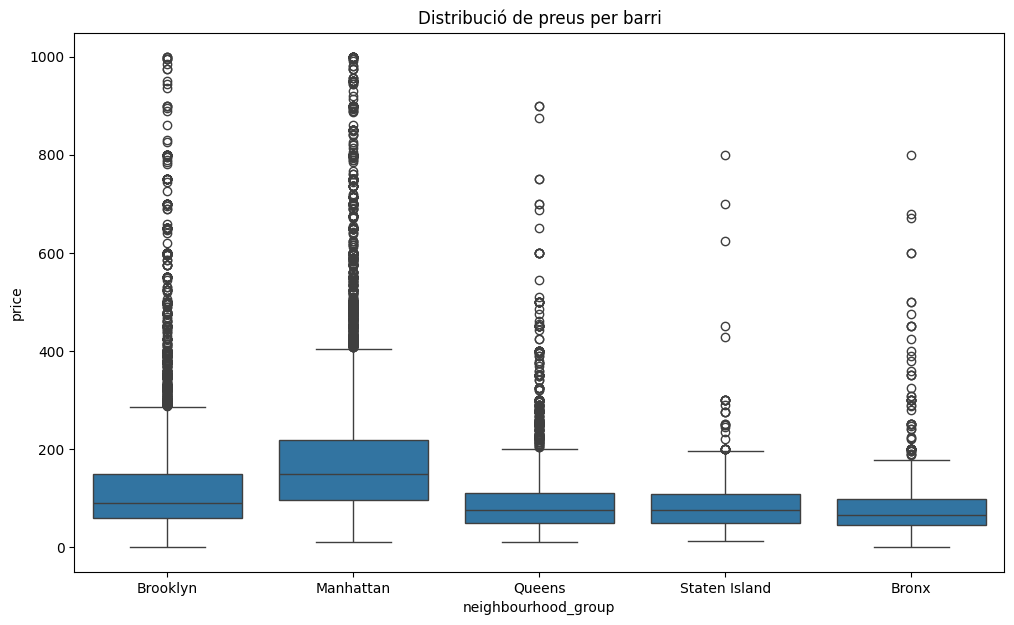

In [40]:
#fem gràfic de caixa per veure millors la distribució i també veure els valors que destaquen 
#gràfic de preu per cada barri per veure com es distribueixen

plt.figure(figsize=(12, 7))
sns.boxplot(x='neighbourhood_group', y='price', data=df[df['price'] < 1000])
plt.title("Distribució de preus per barri")
plt.show()

##### Comparació de preus per la localització 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


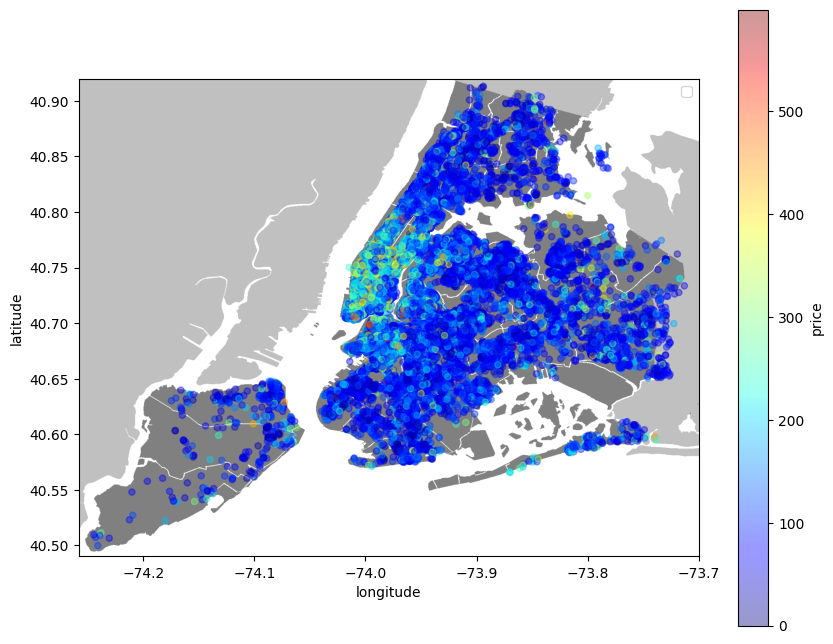

In [41]:
import urllib
from PIL import Image
import matplotlib.pyplot as plt

# Filtrar los datos
sub_6 = df[df.price < 600]

# Inicializar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Cargar la imagen desde la URL usando PIL
url = 'https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'
with urllib.request.urlopen(url) as i:
    nyc_img = Image.open(i)

# Mostrar la imagen como fondo, ajustando las coordenadas
plt.imshow(nyc_img, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])

# Obtener el eje actual
ax = plt.gca()

# Graficar el scatterplot
sub_6.plot(
    kind='scatter', 
    x='longitude', 
    y='latitude', 
    c='price', 
    ax=ax, 
    cmap=plt.get_cmap('jet'), 
    colorbar=True, 
    alpha=0.4, 
    zorder=5
)

# Mostrar la leyenda y la gráfica
plt.legend()
plt.show()

##### Comparació de preus segons tipus d'habitació 

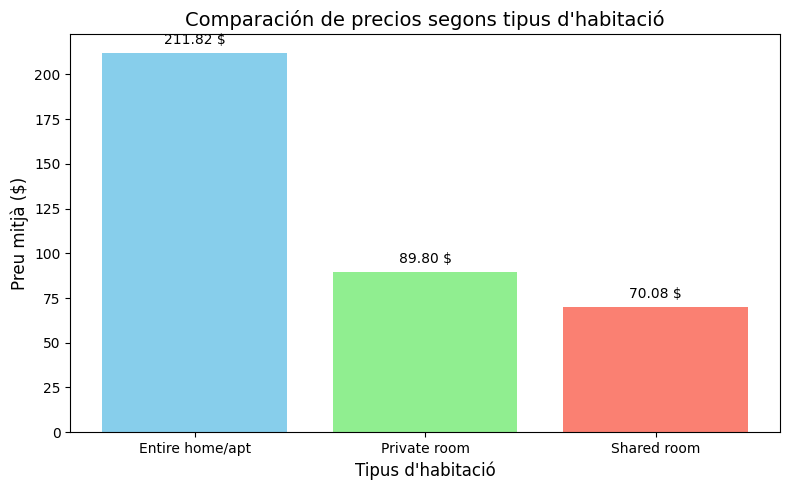

In [ ]:
# Calcular el precio medio por tipo de habitación
price_by_room_type = df.groupby('room_type')['price'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(price_by_room_type['room_type'], price_by_room_type['price'], color=['skyblue', 'lightgreen', 'salmon', 'orange'])

# Añadir etiquetas y título
plt.title("Comparación de precios segons tipus d'habitació", fontsize=14)
plt.xlabel("Tipus d'habitació", fontsize=12)
plt.ylabel('Preu mitjà ($)', fontsize=12)

# Añadir los valores encima de las barras
for index, value in enumerate(price_by_room_type['price']):
    plt.text(index, value + 5, f"{value:.2f} $", ha='center', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

##### Comparació de preus segons la disponibilitat  

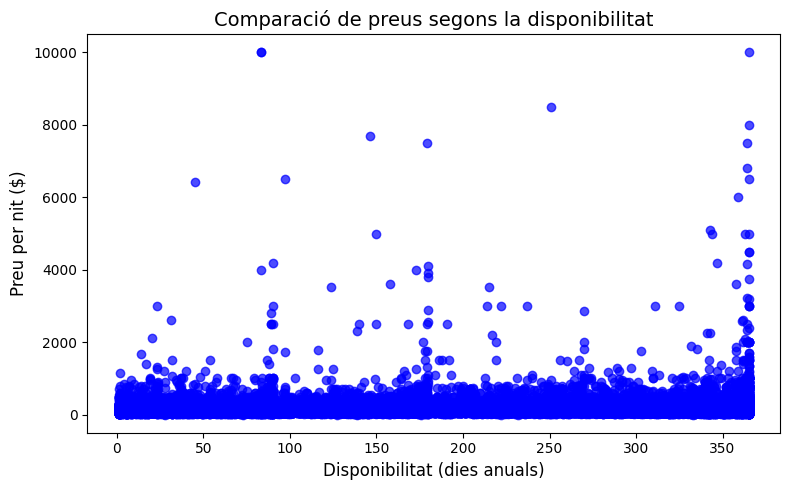

In [43]:
# Filtrar datos donde la disponibilidad sea mayor a 0
filtered_df = df[df['availability_365'] > 0]

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 5))
plt.scatter(filtered_df['availability_365'], filtered_df['price'], color='blue', alpha=0.7)

# Añadir etiquetas y título
plt.title('Comparació de preus segons la disponibilitat', fontsize=14)
plt.xlabel('Disponibilitat (dies anuals)', fontsize=12)
plt.ylabel('Preu per nit ($)', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### Normalització 

Anem a normalitzar les dades, perquè el model tingui un millor rendiment. 

In [44]:
num_features = df_new.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(num_features)

['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [45]:
from sklearn.preprocessing import StandardScaler

# Inicializa el scaler
scaler = StandardScaler()

# Ajusta y transforma los datos
df_new[num_features] = scaler.fit_transform(df_new[num_features])

print(df_new.head())

   neighbourhood_group  neighbourhood  latitude  longitude  room_type  price  \
0                    1            108    -1.502     -0.490          1  0.192   
1                    2            127     0.456     -0.800          0  1.102   
2                    2             94     1.478      0.342          1  0.204   
3                    1             41    -0.808     -0.146          0 -0.527   
4                    2             61     1.284      0.285          0 -0.634   

   minimum_nights  number_of_reviews  reviews_per_month  \
0          -0.851             -0.328             -0.627   
1          -0.851              1.441             -0.490   
2          -0.249             -0.770             -0.797   
3          -0.851              2.105              2.345   
4           1.859             -0.328             -0.716   

   calculated_host_listings_count  availability_365  
0                           1.990             1.916  
1                           0.406             1.840  
2 

### ENTRENAMENT I EVALUACIÓ DEL MODEL

In [46]:
df_new = df_new.drop(columns=['neighbourhood_group'])
X = df_new.drop(columns=["price"])
y = df_new["price"]

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

Normalitzem les dades

In [48]:
from sklearn.preprocessing import StandardScaler

#scalerX = StandardScaler().fit(X_train)
#scalery = StandardScaler().fit(y_train)

#X_train = scalerX.transform(X_train)
#y_train = scalery.transform(y_train)
#X_test = scalerX.transform(X_test)
#y_test = scalery.transform(y_test)

#print (np.max(X_train), np.min(X_train), np.mean(X_train), np.max(y_train), np.min(y_train), np.mean(y_train))


sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

scy = StandardScaler()

y_train = np.asarray(y_train)
y_train = y_train.reshape(-1,1)
y_train = scy.fit_transform(y_train)

y_test = np.asarray(y_test)
y_test = y_test.reshape(-1,1)
y_test = scy.fit_transform(y_test)
                                                  

#print (np.max(X_train), np.min(X_train), np.mean(X_train), np.max(y_train), np.min(y_train), np.mean(y_train))


In [49]:
from sklearn.model_selection import *

def train_and_evaluate(clf, X_train, y_train):
    
    clf.fit(X_train, y_train)
    
    print ("Coefficient of determination on training set:",clf.score(X_train, y_train))
    
    # create a k-fold croos validation iterator of k=5 folds
    cv = KFold(5, shuffle=True, random_state=33)
    scores = cross_val_score(clf, X_train, y_train, cv=cv)
    print ("Average coefficient of determination using 5-fold crossvalidation:",np.mean(scores))

In [50]:
from sklearn import linear_model

clf_sgd = linear_model.SGDRegressor(loss='squared_error', penalty=None,  random_state=42)

train_and_evaluate(clf_sgd,X_train,y_train)

print (clf_sgd.coef_)

Coefficient of determination on training set: 0.44249208593895595
Average coefficient of determination using 5-fold crossvalidation: 0.4417443650118463
[ 0.04688385  0.10662354 -0.25686904 -0.53485416 -0.11184512 -0.09958539
 -0.0130876   0.01563776  0.16821336]


C:\Users\eferr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eferr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eferr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

Amb un model lineal només expliquem el 8% de les dades, anem a probar amb una regressió més complexa, ja que la lineal sembla no ser suficient

Regressió polinómica

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [52]:
# Crear términos polinómicos (grado 2, se puede ajustar según lo necesites)

for degree in range(2, 4):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Ajustar un modelo de regresión lineal a los datos polinómicos
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predicciones
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Evaluación del modelo
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    print(f"Degree: {degree}")
    print(f"R² en entrenamiento: {train_r2}")
    print(f"R² en prueba: {test_r2}")
    print(f"MSE en entrenamiento: {train_mse}")
    print(f"MSE en prueba: {test_mse}")
    print("\n")

'''
# Visualización
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", label="Datos reales")
plt.scatter(X_train, y_train_pred, color="red", label="Predicción (entrenamiento)")
plt.scatter(X_test, y_test_pred, color="green", label="Predicción (prueba)")
plt.xlabel("X")
plt.ylabel("y")
plt.title(f"Regresión Polinomial (grado {degree})")
plt.legend()
plt.show()
'''

Degree: 2
R² en entrenamiento: 0.5156660838928089
R² en prueba: 0.5082671734532314
MSE en entrenamiento: 0.48433391610719095
MSE en prueba: 0.4917328265467686


Degree: 3
R² en entrenamiento: 0.5438318818443078
R² en prueba: -5387428650102.667
MSE en entrenamiento: 0.45616811815569214
MSE en prueba: 5387428650103.667




'\n# Visualización\nplt.figure(figsize=(10, 6))\nplt.scatter(X, y, color="blue", label="Datos reales")\nplt.scatter(X_train, y_train_pred, color="red", label="Predicción (entrenamiento)")\nplt.scatter(X_test, y_test_pred, color="green", label="Predicción (prueba)")\nplt.xlabel("X")\nplt.ylabel("y")\nplt.title(f"Regresión Polinomial (grado {degree})")\nplt.legend()\nplt.show()\n'

Añadimos regularización con Ridge

In [53]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
# Modelo con regularización L2 (Ridge)
ridge_model = Ridge(alpha=1.0)  # Ajusta alpha según sea necesario
ridge_model.fit(X_train_poly, y_train)

# Evaluar
train_r2 = ridge_model.score(X_train_poly, y_train)
test_r2 = ridge_model.score(X_test_poly, y_test)
print(f"R² en entrenamiento: {train_r2}")
print(f"R² en prueba: {test_r2}")

R² en entrenamiento: 0.5438318708444088
R² en prueba: 0.5240781975942035


Probamos Decission Tree

In [54]:
from sklearn.tree import DecisionTreeRegressor

# Entrenamiento
dtr = DecisionTreeRegressor(min_samples_leaf=60)
dtr.fit(X_train, y_train)

# Evaluar usando los mismos conjuntos
train_r2 = dtr.score(X_train, y_train)
test_r2 = dtr.score(X_test, y_test)

print(f"R² en entrenamiento: {train_r2}")
print(f"R² en prueba: {test_r2}")


R² en entrenamiento: 0.5781185341497777
R² en prueba: 0.5152388090841356


Probamos con randomforest

In [55]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train.ravel())

# Evaluar
train_r2 = rf_model.score(X_train, y_train)
test_r2 = rf_model.score(X_test, y_test)
print(f"R² en entrenamiento: {train_r2}")
print(f"R² en prueba: {test_r2}")

R² en entrenamiento: 0.9397990320241291
R² en prueba: 0.544361351227922


Anem a seleccionar els millors hiperparàmetres. Ho farem per el randomforest ja que es el que millor resultat ens dona

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Inicializa el modelo Random Forest
rfr = RandomForestRegressor(random_state=42)

# Define la cuadrícula de parámetros para la búsqueda

param_grid = {'n_estimators': [100, 200, 300, 400, 500],
              'max_depth': [10, 20, 30, 40, 50],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

# Configura RandomizedSearchCV
rf_random = RandomizedSearchCV(
    estimator=rfr, 
    param_distributions=param_grid,
    n_iter=10,  # Número de combinaciones a probar
    cv=3,       # Número de divisiones para validación cruzada
    verbose=2,  # Nivel de detalle en la salida
    random_state=42,
    n_jobs=-1   # Usa todos los núcleos disponibles
)

# Ajusta el modelo a los datos
rf_random.fit(X_train, y_train)

# Imprime los mejores parámetros encontrados
print(f"Mejores parámetros encontrados: {rf_random.best_params_}")
print(f"Mejor puntaje obtenido: {rf_random.best_score_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\eferr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\eferr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eferr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packag

Mejores parámetros encontrados: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 50}
Mejor puntaje obtenido: 0.5768265807165005


In [57]:
# Best parameters selected.
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 50}

In [58]:
best_rf = rf_random.best_estimator_


In [59]:
from sklearn.preprocessing import PolynomialFeatures

# Transformar X_train y X_test de la misma manera
poly = PolynomialFeatures(degree=2)  # O el grado que hayas usado
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Usar X_train_poly para entrenar el modelo y X_test_poly para predecir
best_rf.fit(X_train_poly, y_train)
y_pred = best_rf.predict(X_test_poly)


C:\Users\eferr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [65]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

'''
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('rf', RandomForestRegressor())
])
'''

#pipeline = Pipeline([('rf', RandomForestRegressor())])

model = RandomForestRegressor()

# Ajustar y predecir
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calcular métricas
test_score = r2_score(y_test, y_pred)
train_score = model.score(X_train, y_train)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² en prueba: {test_score}")
print(f"R² en entrenamiento: {train_score}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")

C:\Users\eferr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R² en prueba: 0.545840880142542
R² en entrenamiento: 0.9395832399879015
MAE: 0.4825033697164333
MSE: 0.45415911985745805


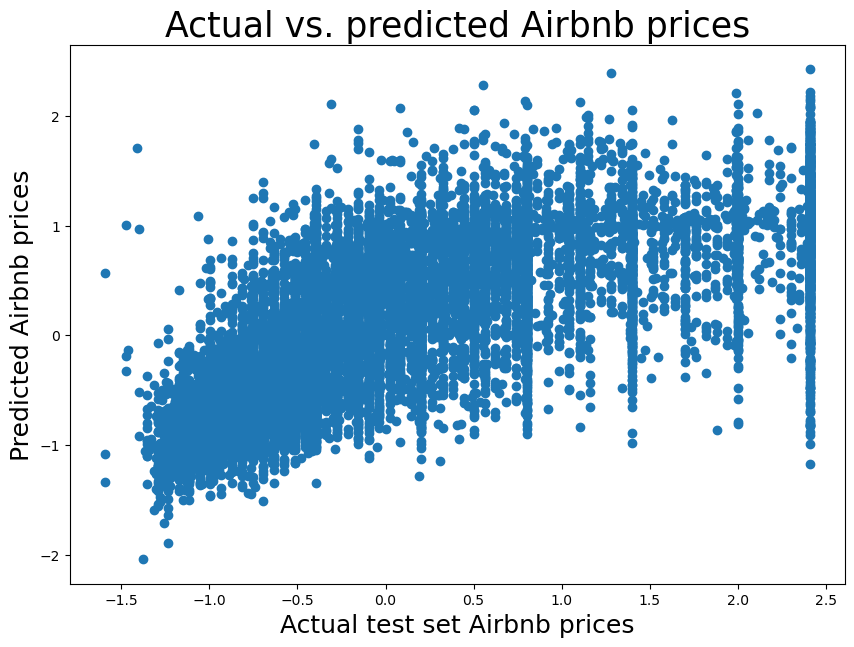

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted Airbnb prices",fontsize=25)
plt.xlabel("Actual test set Airbnb prices",fontsize=18)
plt.ylabel("Predicted Airbnb prices", fontsize=18)
plt.scatter(x=y_test,y=y_test_pred)